In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [22]:
df = pd.read_csv("bank_customer_churn_data.csv")
df.drop(["CustomerID","Exited"],axis=1,inplace=True)
df

,Gender,Age,Country,Tenure_Years,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary
0,Female,32,Spain,3,248728,2,No,No,85004
1,Female,63,France,5,74139,3,Yes,No,66250
2,Male,27,Spain,3,47288,1,Yes,No,139666
3,Female,62,Spain,9,77118,2,Yes,Yes,97044
4,Male,57,Germany,3,51994,2,Yes,Yes,86991
...,...,...,...,...,...,...,...,...,...
695,Male,45,Germany,12,174888,2,Yes,Yes,65435
696,Female,46,Germany,2,31798,3,Yes,Yes,40445
697,Male,37,France,7,208775,1,Yes,Yes,140936
698,Male,58,Germany,13,221001,3,Yes,Yes,69087


In [23]:
x = df[["Age","Tenure_Years","Balance","NumOfProducts","EstimatedSalary"]]
x

,Age,Tenure_Years,Balance,NumOfProducts,EstimatedSalary
0,32,3,248728,2,85004
1,63,5,74139,3,66250
2,27,3,47288,1,139666
3,62,9,77118,2,97044
4,57,3,51994,2,86991
...,...,...,...,...,...
695,45,12,174888,2,65435
696,46,2,31798,3,40445
697,37,7,208775,1,140936
698,58,13,221001,3,69087


In [24]:
scalar = StandardScaler()
scalar_data = scalar.fit_transform(x)
scalar_data

array([[-0.85279663, -1.17473092,  1.64230992,  0.02079326, -0.04783143],
       [ 1.01250797, -0.67024525, -0.75091518,  1.23373351, -0.54852908],
       [-1.15365222, -1.17473092, -1.1189824 , -1.19214699,  1.41154444],
       ...,
       [-0.55194105, -0.16575958,  1.09464356, -1.19214699,  1.44545112],
       [ 0.71165239,  1.34769743,  1.2622347 ,  1.23373351, -0.47278634],
       [ 1.43370578,  0.33872609, -0.73394497, -1.19214699,  0.83400943]],
      shape=(700, 5))

In [25]:
model = KMeans(n_clusters=3,random_state=22)
model.fit(scalar_data)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,22
,copy_x,True
,algorithm,'lloyd'


In [26]:
label = model.labels_
label

array([2, 2, 1, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 0, 1, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1,
       0, 2, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0, 2, 1, 2,
       0, 2, 2, 0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 1, 2, 1, 0,
       2, 0, 1, 1, 0, 2, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 2, 0, 1, 2,
       0, 1, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 1, 1, 0, 2,
       0, 0, 1, 1, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       0, 1, 2, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 0, 2, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0,
       0, 1, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 2, 2, 1, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1, 2, 2, 0, 2, 2, 0, 1, 2,
       1, 2, 2, 2, 0, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2,
       0, 1, 1, 0, 2, 0, 1, 2, 1, 1, 2, 2, 1, 0, 2,

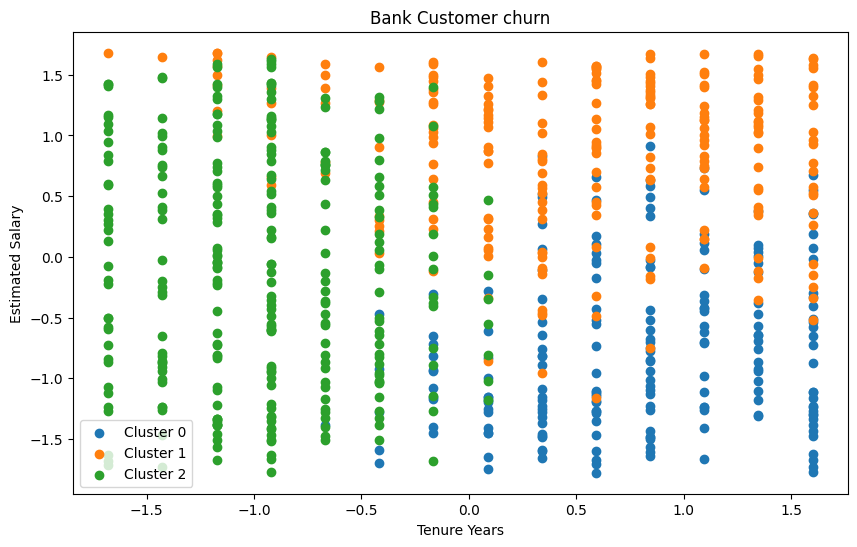

In [33]:
plt.figure(figsize=(10,6))
for i in np.unique(label):
    plt.scatter(scalar_data[label==i,1],scalar_data[label==i,4],label=f'Cluster {i}')
plt.legend()
plt.xlabel("Tenure Years")
plt.ylabel("Estimated Salary")
plt.title("Bank Customer churn")
plt.show()
